In [1]:
from Packages.SplitEbinMetric import *
from Packages.GeoPlot import *
import matplotlib.pyplot as plt
import scipy.io as sio
import torch
import numpy as np

In [2]:
g00 = sio.loadmat('Data/103818_orig_tensors_masked_bg.mat')
g11 = sio.loadmat('Data/105923_orig_tensors_masked_bg.mat')
g00 = torch.from_numpy(g00['tensor']).double()
g11 = torch.from_numpy(g11['tensor']).double()
height = g00.size(-2)
width = g00.size(-1)
g0, g1 = torch.zeros(2,2,height,width,dtype=torch.double), torch.zeros(2,2,height,width,dtype=torch.double)
g0[0,0,:,:] = g00[0,:,:]
g0[0,1,:,:] = g00[1,:,:]
g0[1,0,:,:] = g00[1,:,:]
g0[1,1,:,:] = g00[2,:,:]
g1[0,0,:,:] = g11[0,:,:]
g1[0,1,:,:] = g11[1,:,:]
g1[1,0,:,:] = g11[1,:,:]
g1[1,1,:,:] = g11[2,:,:]
g0 = g0.permute(2,3,0,1)
g1 = g1.permute(2,3,0,1)

In [3]:
a = 0.5
Tpts = 5
geo_group = get_geo(g0, g1, a, Tpts)

/home/sci/hdai/MetricMatchZhe/Packages/SplitEbinMetric.py:306: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629403081/work/torch/csrc/utils/python_arg_parser.cpp:766.)
  Ind_inRange = (theta<0).nonzero().reshape(-1)


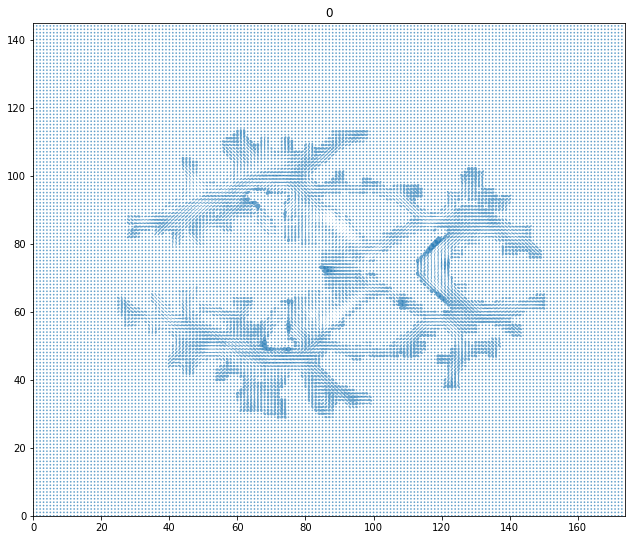

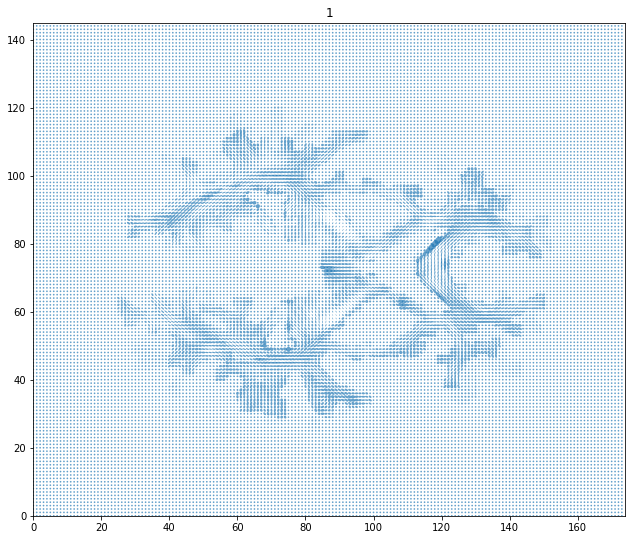

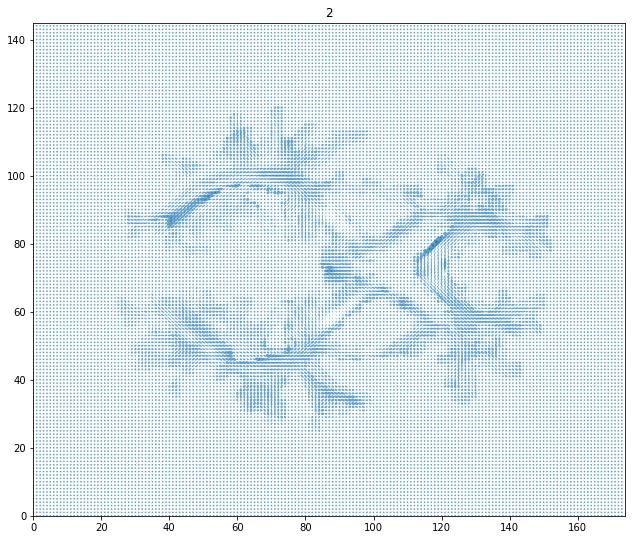

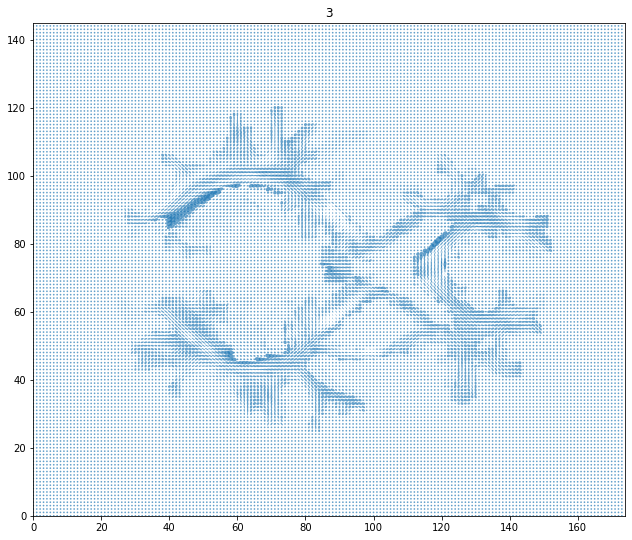

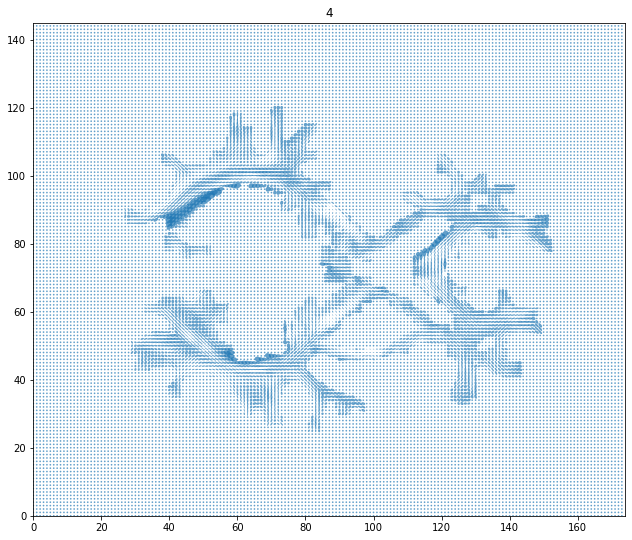

In [5]:
for i in range(Tpts):
    show_2d_tensors(geo_group[i].permute(2,3,0,1), scale=1000, title=str(i), margin=0.05, dpi=20)